It should be pretty obvious that if steering or accelerating is gaussian, then the propagated position will be distributed non-gaussian...

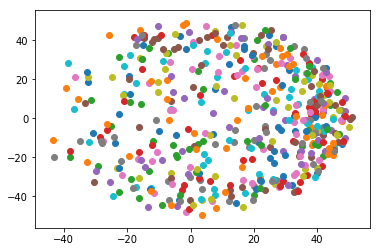

In [6]:
%matplotlib inline
import sympy as sp
from itertools import accumulate
import numpy as np
import math
import matplotlib.pyplot as plt

def simulate_deterministic(initial_state, steers, accels):
    """
    Given an initial state and control inputs for a horizon, simulate the deterministic model.
    Args:
        initial_state: instance of CarState
        steers: control sequence
        accels: control sequence
    """
    # Construct lists of theta and v across the full time horizon
    # theta_t is just the sum theta_0 + theta_1 + ... + theta_{t-1}
    thetas = list(accumulate([initial_state.theta] + steers))
    cos_thetas = np.cos(thetas)
    sin_thetas = np.sin(thetas)
    vs = list(accumulate([initial_state.v] + accels))
    n_step = len(accels) + 1
    xs = n_step * [None]
    ys = n_step * [None]
    xs[0] = initial_state.x
    ys[0] = initial_state.y
    for i in range(1, n_step):
        xs[i] = xs[i-1] + vs[i-1] * cos_thetas[i-1]
        ys[i] = ys[i-1] + vs[i-1] * sin_thetas[i-1]
    return xs, ys, vs, thetas

class InputVariables(object):
    def __init__(self, **attrs):
        for name, value in attrs.items():
            setattr(self, name, value)


class UncontrolledKinematicCarPositionMoments(object):
    def __init__(self, E_x, E_y, E_xy, E2_x, E2_y):
        self.E_x = E_x
        self.E_y = E_y
        self.E_xy = E_xy
        self.E2_x = E2_x
        self.E2_y = E2_y

class CarState(object):
    def __init__(self, x0, y0, v0, theta0):
        self.x = x0
        self.y = y0
        self.v = v0
        self.theta = theta0

cs = CarState(1.0, 1.0, 10.0, 0.0)
steers_samples = np.random.normal(size = (500, 5))        
accels = [0.1, 0.1, 0.1, 0.1, 0.1]

for steers in steers_samples:
    xs, ys, vs, thetas = simulate_deterministic(cs, steers, accels)
    plt.scatter(xs[-1], ys[-1])
plt.show()